Генерация синтетических данных...


/var/folders/nz/747lmqwx7833bmwvfyxjj0jr0000gn/T/ipykernel_9799/2791231570.py:78: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  data[feat_name] = pd.to_datetime(base + pd.TimedeltaIndex(shift, unit='D'))
/var/folders/nz/747lmqwx7833bmwvfyxjj0jr0000gn/T/ipykernel_9799/2791231570.py:78: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  data[feat_name] = pd.to_datetime(base + pd.TimedeltaIndex(shift, unit='D'))
/var/folders/nz/747lmqwx7833bmwvfyxjj0jr0000gn/T/ipykernel_9799/2791231570.py:78: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  data[feat_name] = pd.to_datetime(base + pd.TimedeltaIndex(shift, unit='D'))
/var/folders/nz/747lmqwx7833bmwvfyxjj0jr0000gn/T/ipykernel_9799/279123157

Пропускаем корреляцию num_cont_1 -> num_cont_51: ключи не найдены
Пропускаем корреляцию num_cont_2 -> num_cont_52: ключи не найдены
Пропускаем корреляцию num_cont_3 -> num_cont_53: ключи не найдены
Пропускаем корреляцию num_cont_4 -> num_cont_54: ключи не найдены
Пропускаем корреляцию num_cont_5 -> num_cont_55: ключи не найдены
Пропускаем корреляцию num_cont_6 -> num_cont_56: ключи не найдены
Пропускаем корреляцию num_cont_7 -> num_cont_57: ключи не найдены
Пропускаем корреляцию num_cont_8 -> num_cont_58: ключи не найдены
Пропускаем корреляцию num_cont_9 -> num_cont_59: ключи не найдены
Пропускаем корреляцию num_cont_10 -> num_cont_60: ключи не найдены
Датасет сгенерирован: 30000 строк, 100 признаков + target
Распределение target: target
0    0.883
1    0.117
Name: proportion, dtype: float64
Пропуски по признакам: count      100.000
mean      6115.330
std       4246.776
min          0.000
25%       2751.750
50%       6395.000
75%       9738.000
max      12943.000
dtype: float64
Данные 

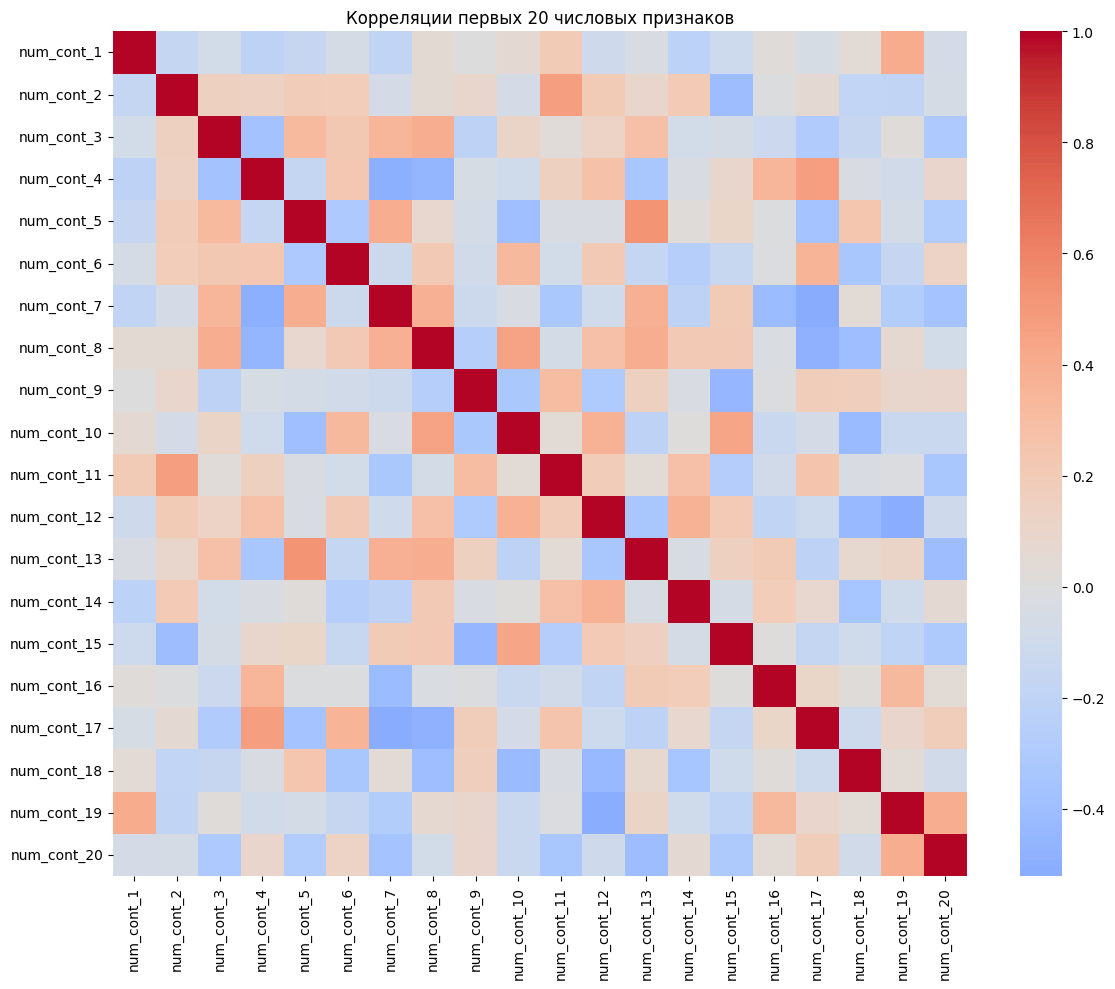

In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import seaborn as sns

# Установка random seed для воспроизводимости
np.random.seed(42)

# Параметры датасета
N_SAMPLES = 300000
N_FEATURES = 300
N_INFORMATIVE = 20
N_REDUNDANT = 30
N_CLASSES = 2  # Бинарный таргет

print("Генерация синтетических данных...")

# 1. Базовый датасет с информативными, redundant и noise признаками (числовые)
X_base, y = make_classification(
    n_samples=N_SAMPLES,
    n_features=N_INFORMATIVE + N_REDUNDANT,
    n_informative=N_INFORMATIVE,
    n_redundant=N_REDUNDANT,
    n_clusters_per_class=2,
    weights=[0.95, 0.05],  # Несбалансированный таргет
    flip_y=0.3,
    сд
    random_state=42
)

# 2. Создание полного датасета с различными типами признаков
feature_names = []
data = {}

# Числовые continuous признаки (50 шт)
for i in range(50):
    feat_name = f'num_cont_{i+1}'
    # Добавляем шум и нелинейные зависимости
    data[feat_name] = X_base[:, i % (N_INFORMATIVE + N_REDUNDANT)] + np.random.normal(0, 0.5, N_SAMPLES)
    feature_names.append(feat_name)

# Категориальные признаки (20 шт) - ПРАВИЛЬНО ИСПРАВЛЕНО
categories_options = [3, 5, 7]  # Разное число категорий
for i in range(20):
    feat_name = f'cat_{i+1}'
    n_cats = np.random.choice(categories_options)
    
    # Создаем полное распределение вероятностей для максимального числа категорий
    full_probs = [0.4, 0.25, 0.15, 0.1, 0.05, 0.03, 0.02]
    
    # Обрезаем до нужного числа категорий и нормализуем
    probs = np.array(full_probs[:n_cats])
    probs = probs / probs.sum()  # Нормализация
    
    # Корреляция с таргетом: класс 0 чаще низкие категории
    base_cat = np.random.choice(n_cats, N_SAMPLES, p=probs)
    data[feat_name] = np.where(
        y == 1, 
        np.clip(base_cat + np.random.choice([-1,0,1], N_SAMPLES, p=[0.1,0.7,0.2]), 0, n_cats-1),
        base_cat
    ).astype(int)
    feature_names.append(feat_name)

# Бинарные признаки (20 шт)
for i in range(20):
    feat_name = f'bin_{i+1}'
    # Корреляция: некоторые сильно коррелируют с таргетом
    prob = 0.3 + 0.4 * (y == 1) + np.random.normal(0, 0.1, N_SAMPLES)
    data[feat_name] = np.random.binomial(1, prob.clip(0,1))
    feature_names.append(feat_name)

# Даты (5 шт)
date_bases = pd.date_range('2020-01-01', periods=365*3, freq='D')
for i in range(5):
    feat_name = f'date_{i+1}'
    base = np.random.choice(date_bases, N_SAMPLES)
    shift = np.random.normal(0, 30, N_SAMPLES).astype(int)  # Сдвиг дней
    data[feat_name] = pd.to_datetime(base + pd.TimedeltaIndex(shift, unit='D'))
    feature_names.append(feat_name)

# Текст (5 шт) - простые строки с длиной коррелирующей с таргетом
for i in range(5):
    feat_name = f'text_{i+1}'
    lengths = np.random.poisson(10 + 5*(y==1), N_SAMPLES)
    data[feat_name] = ['word_' + str(np.random.randint(1,1000)) for _ in range(N_SAMPLES)]
    feature_names.append(feat_name)

# 3. Добавление пропусков (5-30% по признакам, MAR механизм) - ФИНАЛЬНОЕ ИСПРАВЛЕНИЕ
missing_rates = np.random.uniform(0.05, 0.30, N_FEATURES)
for i, feat_name in enumerate(feature_names):
    if np.random.rand() > 0.2:  # Не все признаки имеют пропуски
        miss_mask = np.random.rand(N_SAMPLES) < (missing_rates[i] * (1 + 0.5*(y==0)))
        
        # Универсальное решение для ЛЮБОГО типа данных
        current_data = data[feat_name]
        
        # Проверяем тип данных БЕЗ обращения к .dtype
        try:
            # Если это numpy array
            if hasattr(current_data, 'dtype'):
                if np.issubdtype(current_data.dtype, np.integer):
                    new_data = current_data.astype(float)
                    new_data[miss_mask] = np.nan
                elif np.issubdtype(current_data.dtype, np.floating):
                    new_data = current_data.copy()
                    new_data[miss_mask] = np.nan
                else:
                    new_data = np.full_like(current_data, np.nan, dtype=object)
                    new_data[~miss_mask] = current_data[~miss_mask]
                data[feat_name] = new_data
            else:
                # Это list - универсальный подход
                new_data = [np.nan if mask else val for mask, val in zip(miss_mask, current_data)]
                data[feat_name] = np.array(new_data, dtype=object)
        except:
            # Fallback для всех остальных случаев
            new_data = [np.nan if mask else val for mask, val in zip(miss_mask, current_data)]
            data[feat_name] = np.array(new_data, dtype=object)




# 4. Добавление высокой корреляции между некоторыми признаками - ИСПРАВЛЕНО
corr_pairs = [(f'num_cont_{i+1}', f'num_cont_{i+51}') for i in range(10)]  # i+1 и i+51!
for feat1, feat2 in corr_pairs:
    if feat1 in data and feat2 in data:  # ПРОВЕРКА существования ключей!
        data[feat2] = data[feat1] + np.random.normal(0, 0.1, N_SAMPLES)
    else:
        print(f"Пропускаем корреляцию {feat1} -> {feat2}: ключи не найдены")


# 5. Создание DataFrame
df = pd.DataFrame(data)
df['target'] = y

# Перемешивание строк
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

print(f"Датасет сгенерирован: {df.shape[0]} строк, {len(feature_names)} признаков + target")
print(f"Распределение target: {df['target'].value_counts(normalize=True).round(3)}")
print(f"Пропуски по признакам: {df[feature_names].isnull().sum().describe().round(3)}")

# Сохранение
df.to_csv('synthetic_ml_dataset.csv', index=False)
print("Данные сохранены в 'synthetic_ml_dataset.csv'")

# Быстрый просмотр корреляций (только числовые)
num_cols = df.select_dtypes(include=[np.number]).columns.drop('target', errors='ignore')
corr_matrix = df[num_cols].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix.iloc[:20, :20], annot=False, cmap='coolwarm', center=0)
plt.title('Корреляции первых 20 числовых признаков')
plt.tight_layout()
plt.show()
